<a href="https://colab.research.google.com/github/andhikapepe/KNN-python-implementation-k-nearest-neighbors/blob/main/KNN_python_implementation_k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

In [ ]:
# Unggah file
uploaded = files.upload()

# Dapatkan nama file yang diunggah
file_name = list(uploaded.keys())[0]


Saving waterQuality1.csv to waterQuality1.csv


In [ ]:
# Baca dataset dari file yang diunggah
dataset = pd.read_csv(file_name)
dataset = dataset.select_dtypes(include=['int64', 'float64'])

# Tampilkan beberapa baris pertama dari dataset
print(dataset.head())


   aluminium  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0      0.05      0.20    0.000  0.054     16.08      1.13    0.007   
1      0.90      0.65    0.650  0.100      2.01      1.93    0.003   
2      0.99      0.05    0.003  0.078     14.16      1.11    0.006   
3      1.08      0.71    0.710  0.016      1.41      1.29    0.004   
4      0.61      0.13    0.001  0.117      6.74      1.11    0.003   

   perchlorate  radium  selenium  silver  uranium  
0        37.75    6.78      0.08    0.34     0.02  
1        32.26    3.21      0.08    0.27  

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   arsenic      7999 non-null   float64
 2   barium       7999 non-null   float64
 3   cadmium      7999 non-null   float64
 4   chloramine   7999 non-null   float64
 5   chromium     7999 non-null   float64
 6   copper       7999 non-null   float64
 7   flouride     7999 non-null   float64
 8   bacteria     7999 non-null   float64
 9   viruses      7999 non-null   float64
 10  lead         7999 non-null   float64
 11  nitrates     7999 non-null   float64
 12  nitrites     7999 non-null   float64
 13  mercury      7999 non-null   float64
 14  perchlorate  7999 non-null   float64
 15  radium       7999 non-null   float64
 16  selenium     7999 non-null   float64
 17  silver       7999 non-null   float64
 18  uranium      7999 non-null   float64
dtypes: flo

# **contoh menggunakan drop data**

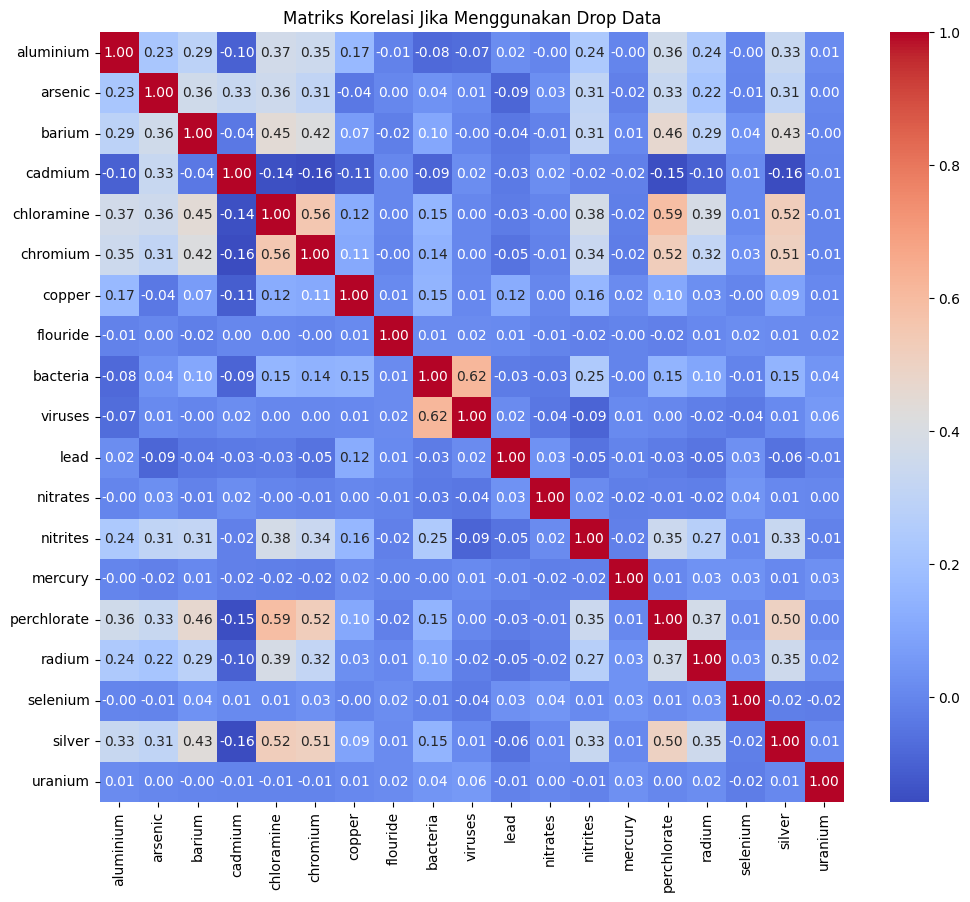

X_train
[[ 0.54055809 -0.63523862  0.19924528 ...  1.82079257 -0.68426323
   0.22445696]
 [-0.4949609  -0.44123658 -1.17409283 ... -0.84402189 -1.72708457
  -0.61153461]
 [-0.48705617 -0.40164433 -1.0096212  ... -1.12815397 -1.03187034
  -0.75086654]
 ...
 [ 1.35474477  0.6673465   0.18279812 ...  0.59816364  1.40137944
   0.9211166 ]
 [-0.50286562 -0.56001334  0.44595272 ... -0.30158793  1.05377233
   2.17510395]
 [-0.40800892 -0.44123658  1.90975023 ... -0.6804307  -0.68426323
  -0.61153461]]

 y_train
[0.08 0.02 0.09 ... 0.08 0.02 0.04]

 X_test
[[-0.47915145 -0.44123658  1.69593711 ...  0.42165735  0.01095099
   1.82677413]
 [ 2.3112165   0.86530777 -0.51620631 ... -0.8999873   0.3585581
   0.57278678]
 [-0.51077035 -0.56001334 -0.35173468 ... -0.88276717 -1.37947746
  -0.54186864]
 ...
 [-0.48705617 -0.24327531 -0.54087706 ... -1.23577975 -0.68426323
  -0.54186864]
 [-0.47915145 -0.48082883 -1.17409283 ... -0.83971686  0.70616522
  -0.89019846]
 [-0.47915145 -0.56001334  1.7863965

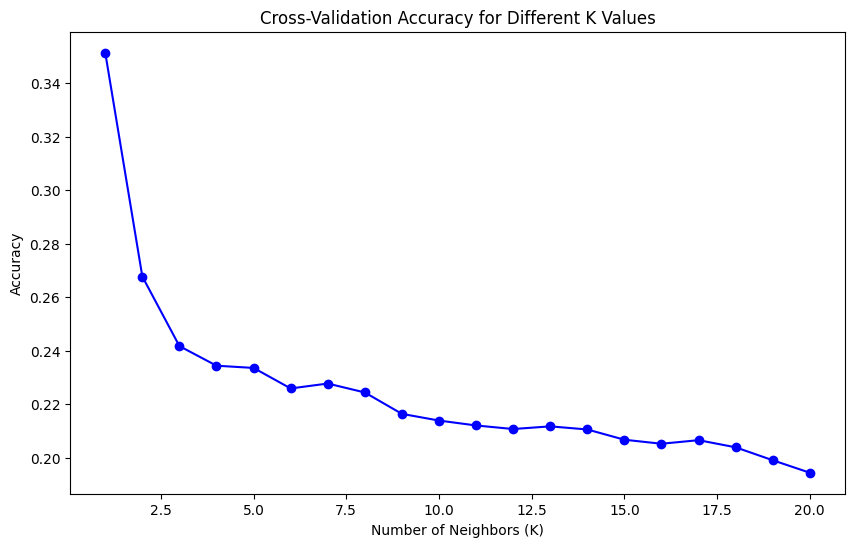

Accuracy on Test Set: 0.3825


In [144]:
# Menangani nilai yang hilang (contoh menggunakan drop data)
# Periksa terlebih dahulu jumlah nilai yang hilang
missing_values = dataset.isnull().sum()

# Jika ada nilai yang hilang, drop baris yang mengandung nilai yang hilang
if missing_values.any():
    dataset = dataset.dropna()

# Visualisasi matriks korelasi jika menggunakan drop data
correlation_matrix_drop = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_drop, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Jika Menggunakan Drop Data")
plt.show()

# Pisahkan fitur (X) dan variabel target (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Standarisasi fitur menggunakan StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

print("X_train")
print(X_train)
print("\n y_train")
print(y_train)
print("\n X_test")
print(X_test)
print("\n y_test")
print(y_test)

# Konversi variabel target menjadi kategori
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Inisialisasi kumpulan nilai K yang akan diuji
k_values = np.arange(1, 21)
accuracy_scores = []

# Uji nilai K menggunakan metode validasi silang (cross-validation)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Temukan nilai K terbaik yang memberikan akurasi tertinggi
best_k = k_values[np.argmax(accuracy_scores)]
print("Best K:", best_k)

# Visualisasi akurasi untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()

# Buat model KNN dengan K terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Prediksi menggunakan model terbaik pada set pengujian
y_pred = best_knn_model.predict(X_test)

# Hitung dan tampilkan akurasi pada set pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# **contoh menggunakan imputasi rata-rata**

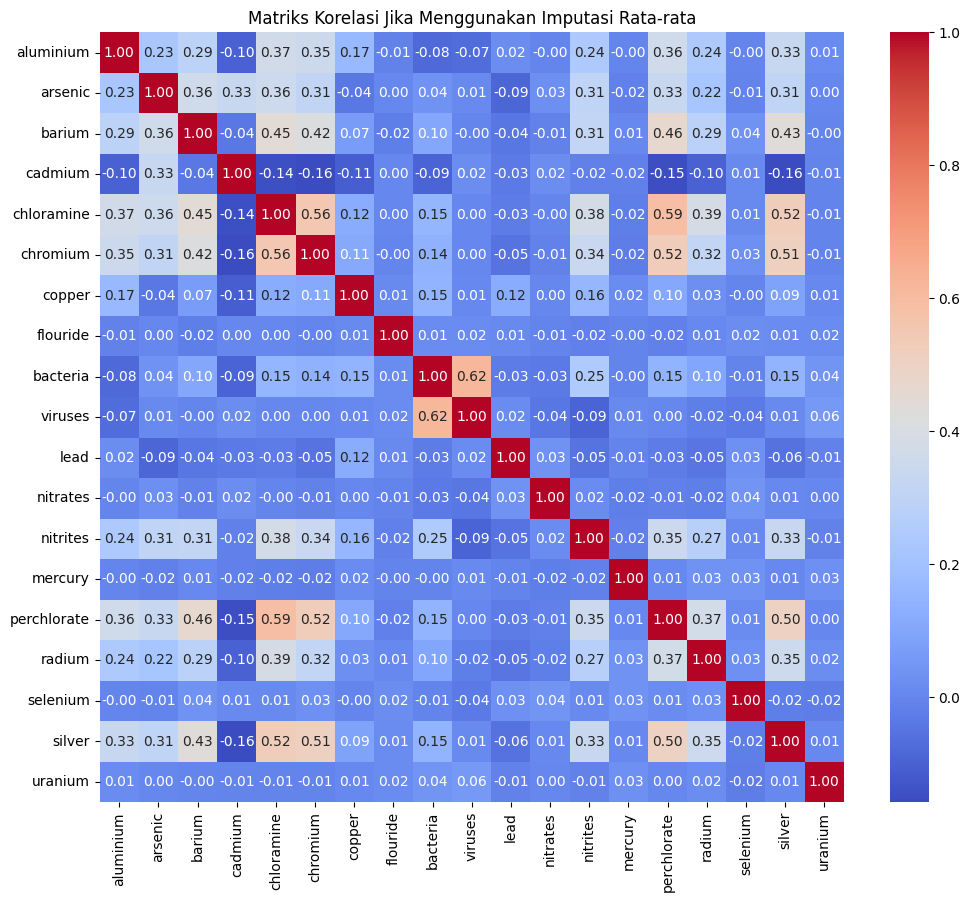

X_train
[[ 0.54055809 -0.63523862  0.19924528 ...  1.82079257 -0.68426323
   0.22445696]
 [-0.4949609  -0.44123658 -1.17409283 ... -0.84402189 -1.72708457
  -0.61153461]
 [-0.48705617 -0.40164433 -1.0096212  ... -1.12815397 -1.03187034
  -0.75086654]
 ...
 [ 1.35474477  0.6673465   0.18279812 ...  0.59816364  1.40137944
   0.9211166 ]
 [-0.50286562 -0.56001334  0.44595272 ... -0.30158793  1.05377233
   2.17510395]
 [-0.40800892 -0.44123658  1.90975023 ... -0.6804307  -0.68426323
  -0.61153461]]

 y_train
[0.08 0.02 0.09 ... 0.08 0.02 0.04]

 X_test
[[-0.47915145 -0.44123658  1.69593711 ...  0.42165735  0.01095099
   1.82677413]
 [ 2.3112165   0.86530777 -0.51620631 ... -0.8999873   0.3585581
   0.57278678]
 [-0.51077035 -0.56001334 -0.35173468 ... -0.88276717 -1.37947746
  -0.54186864]
 ...
 [-0.48705617 -0.24327531 -0.54087706 ... -1.23577975 -0.68426323
  -0.54186864]
 [-0.47915145 -0.48082883 -1.17409283 ... -0.83971686  0.70616522
  -0.89019846]
 [-0.47915145 -0.56001334  1.7863965

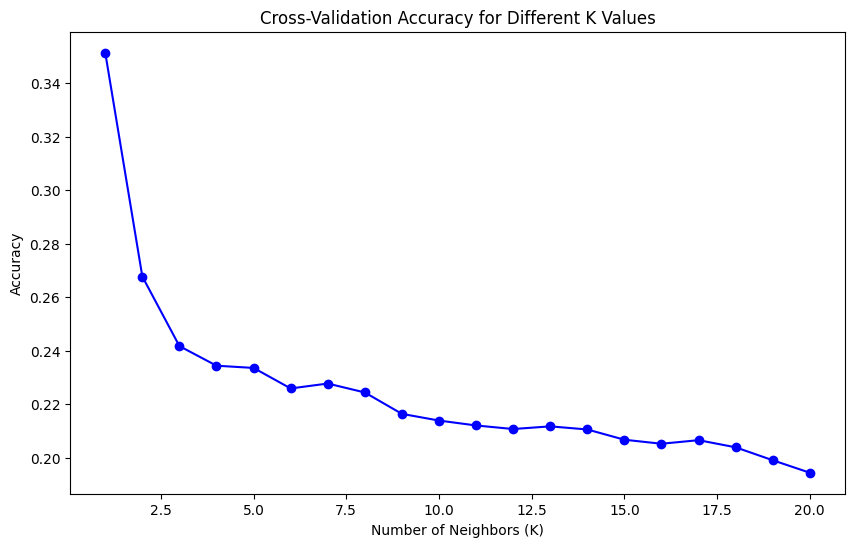

Accuracy on Test Set: 0.3825


In [146]:
# Menangani nilai yang hilang (contoh menggunakan imputasi rata-rata)
# Periksa terlebih dahulu jumlah nilai yang hilang
missing_values = dataset.isnull().sum()

# Jika ada nilai yang hilang, gunakan imputasi rata-rata
if missing_values.any():
    # Periksa apakah kolom target mengandung nilai yang hilang
    if 'is_safe' in dataset.columns and missing_values['is_safe'] > 0:
        # Jangan lakukan imputasi pada kolom target
        pass
    else:
        dataset.fillna(dataset.mean(), inplace=True)

# Visualisasi matriks korelasi jika menggunakan imputasi rata-rata
correlation_matrix_mean_imputation = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_mean_imputation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Jika Menggunakan Imputasi Rata-rata")
plt.show()


# Pisahkan fitur (X) dan variabel target (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Standarisasi fitur menggunakan StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

print("X_train")
print(X_train)
print("\n y_train")
print(y_train)
print("\n X_test")
print(X_test)
print("\n y_test")
print(y_test)

# Konversi variabel target menjadi kategori
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Inisialisasi kumpulan nilai K yang akan diuji
k_values = np.arange(1, 21)
accuracy_scores = []

# Uji nilai K menggunakan metode validasi silang (cross-validation)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Temukan nilai K terbaik yang memberikan akurasi tertinggi
best_k = k_values[np.argmax(accuracy_scores)]
print("Best K:", best_k)

# Visualisasi akurasi untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()

# Buat model KNN dengan K terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Prediksi menggunakan model terbaik pada set pengujian
y_pred = best_knn_model.predict(X_test)

# Hitung dan tampilkan akurasi pada set pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
